# Problem Set 1

This problem set is meant to help you familiarize yourself with Python and Pandas. This is meant to be a very gentle introduction -- if you find this problem set to be difficult, you might want to consider taking a more introductory course.

### Before You Start
For this problem set, you should download INF0251-PS1.ipynb from bCourses. Create a local copy of the notebook and rename it LASTNAME_FIRSTNAME-PS1.ipynb. Then edit your renamed file directly in your browser by typing:
```
jupyter notebook <name_of_downloaded_file>
```

Make sure the following libraries load correctly (hit Ctrl-Enter).

In [1]:
#IPython is what you are using now to run the notebook
import IPython
print("IPython version:      %6.6s (need at least 1.0)" % IPython.__version__)

# Numpy is a library for working with Arrays
import numpy as np
print("Numpy version:        %6.6s (need at least 1.7.1)" % np.__version__)

# SciPy implements many different numerical algorithms
import scipy as sp
print("SciPy version:        %6.6s (need at least 0.12.0)" % sp.__version__)

# Pandas makes working with data tables easier
import pandas as pd
print("Pandas version:       %6.6s (need at least 0.11.0)" % pd.__version__)

# Module for plotting
import matplotlib
print("Maplotlib version:    %6.6s (need at least 1.2.1)" % matplotlib.__version__)

# SciKit Learn implements several Machine Learning algorithms
import sklearn
print("Scikit-Learn version: %6.6s (need at least 0.13.1)" % sklearn.__version__)

IPython version:       8.7.0 (need at least 1.0)
Numpy version:        1.23.5 (need at least 1.7.1)
SciPy version:         1.9.3 (need at least 0.12.0)
Pandas version:        1.5.2 (need at least 0.11.0)
Maplotlib version:     3.6.2 (need at least 1.2.1)
Scikit-Learn version:  1.1.3 (need at least 0.13.1)


## Introduction to the assignment

For this assignment, you will be using the [California Housing Prices Dataset](https://scikit-learn.org/stable/datasets/real_world.html#california-housing-dataset).  Please read about the dataset carefully before continuing -- it is worth investing a few minutes up front otherwise you are likely to be hopelessly confused! We'll be coming back to this dataset repeatedly throughout the semester. Also, if you're new to analyzing data in Python, please make sure to read the relevant readings linked to on Canvas before beginning, otherwise you'll be stabbing in the dark.

Use the following commands to load the dataset:

In [2]:
from sklearn.datasets import fetch_california_housing
cal_data = fetch_california_housing()

The following commands will provide some basic information about the data:

In [3]:
print(cal_data.DESCR)
print(cal_data.keys())
print(cal_data.feature_names)
print(cal_data.data.shape)
print(cal_data.target.shape)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

The following commands will put together the features and target into a pandas dataframe: 

In [4]:
cal_df = pd.DataFrame(
    data=cal_data.data,
    columns=cal_data.feature_names
)
cal_df['MedHouseVal'] = cal_data['target']

---

## Part 1: Descriptive analysis

### 1.1: Explore the data

Let's dig into the data a bit to see what we're dealing with. The first thing to do is to make sure you understand how the data is organized, what the data types are, whether there is any missing data, and so forth. Get your bearings on your own, then answer the following questions.

 - 1.1.1: How many different variables are there in the dataset, and how many different observations?
 - 1.1.2: What is the datatype of each variable?
 - 1.1.3: Does the dataset contain any missing values?
 - 1.1.4: How would you interpret the row index value?

In [5]:
# 1.1.2
print(cal_df.dtypes)

MedInc         float64
HouseAge       float64
AveRooms       float64
AveBedrms      float64
Population     float64
AveOccup       float64
Latitude       float64
Longitude      float64
MedHouseVal    float64
dtype: object


In [6]:
# 1.1.3
print(cal_df.isnull().sum())

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64


*Provide your answers below:*

 - 1.1.1: According to the data analysis in intro, there are 8 dependent variables,1 independent variable and 20640 different observations.
 - 1.1.2: All variables are of datatype float64.
 - 1.1.3: There is no missing value in dataset.
 - 1.1.4: Each row index value correspond to a specific observation, in our dataset, it is a block group of houses.

### 1.2: Answer some basic questions
 - 1.2.1: What is the average population per block group? What was California's total population in 1990 according to the Census?  
 - 1.2.2: What are the median house values in California's block groups with the lowest and highest populations? 
 - 1.2.3: Suggest 5 block groups that are likely to be vacation resorts. Do a quick Google search to validate your results.
 - 1.2.4: How many census block groups are west of the city of Berkeley (lat: 37.871666, long: -122.272781)?
 - 1.2.5: What fraction of block groups have an average number of household members greater or equal to 10?

In [7]:
# 1.2.1
print(cal_df['Population'].mean())
print(cal_df['Population'].sum())

1425.4767441860465
29421840.0


In [8]:
# 1.2.2
print(cal_df[cal_df['Population'] == cal_df['Population'].max()]['MedHouseVal'])
print(cal_df[cal_df['Population'] == cal_df['Population'].min()]['MedHouseVal'])

15360    1.344
Name: MedHouseVal, dtype: float64
5342    3.5
Name: MedHouseVal, dtype: float64


In [9]:
# 1.2.3
print(cal_df.sort_values(by = ["AveRooms", "AveBedrms"], ascending = [False, False]).head(5))

       MedInc  HouseAge    AveRooms  AveBedrms  Population  AveOccup  \
1914   1.8750      33.0  141.909091  25.636364        30.0  2.727273   
1979   4.6250      34.0  132.533333  34.066667        36.0  2.400000   
12447  1.6154      17.0   62.422222  14.111111        83.0  1.844444   
1913   4.0714      19.0   61.812500  11.000000       112.0  2.333333   
11862  2.6250      25.0   59.875000  15.312500        28.0  1.750000   

       Latitude  Longitude  MedHouseVal  
1914      38.91    -120.10      5.00001  
1979      38.80    -120.08      1.62500  
12447     33.97    -114.49      0.87500  
1913      39.01    -120.06      4.37500  
11862     40.27    -121.25      0.67500  


In [10]:
# 1.2.4
print(cal_df[cal_df['Longitude']< -122.272781].shape[0])

2167


In [11]:
# 1.2.5
print(cal_df[cal_df['AveOccup'] >= 10].shape[0] / cal_df.shape[0])

0.0017926356589147287


*Provide your answers below:*

 - 1.2.1: The average population per block group is 1425.48. California's total population in 1990 according to the Census is 29421840.
 - 1.2.2: The median house values in California's block groups with the lowest population is 3.5, with the highest population is 1.344.
 - 1.2.3: The 5 blocks that are likely to be vacation resorts are block number 1914,1979,12447,1913,11862 which has large number of average rooms/bedrooms. According to google map, four of them are close to lake Tahoe and the other is close to a wilderness area, which are all vacation resorts.
 - 1.2.4: There are 2167 blocks west of the city of Berkeley.
 - 1.2.5: Only 0.001793 fraction of block groups have an average number of household members greater or equal to 10.

### 1.3: Summary statistics

Create a clean, organized table that shows just the following information (no more, no less) for each variable in the dataset. Note that your table should have K rows (one for each variable) and 7 columns, ordered as below:
 - The name of the variable
 - The number of observations with non-missing values
 - The mean of the variable
 - The standard deviation of the variable
 - The minimum value of the variable
 - The median of the variable
 - The maximum value of the variable

In [12]:
col_name = ['VarName','NumObs','Mean','SD','Min','Median','Max']
cal_df_stat = pd.DataFrame(columns = col_name)
for col_name, col_data in cal_df.items():
    obs = col_data.notnull().sum()
    cal_df_stat.loc[len(cal_df_stat.index)] = [col_name, obs,col_data.mean(), col_data.std(),col_data.min(), col_data.median(),col_data.max()]
cal_df_stat

,VarName,NumObs,Mean,SD,Min,Median,Max
0,MedInc,20640,3.870671,1.899822,0.499900,3.534800,15.000100
1,HouseAge,20640,28.639486,12.585558,1.000000,29.000000,52.000000
2,AveRooms,20640,5.429000,2.474173,0.846154,5.229129,141.909091
3,AveBedrms,20640,1.096675,0.473911,0.333333,1.048780,34.066667
4,Population,20640,1425.476744,1132.462122,3.000000,1166.000000,35682.000000
5,AveOccup,20640,3.070655,10.386050,0.692308,2.818116,1243.333333
6,Latitude,20640,35.631861,2.135952,32.540000,34.260000,41.950000
7,Longitude,20640,-119.569704,2.003532,-124.350000,-118.490000,-114.310000
8,MedHouseVal,20640,2.068558,1.153956,0.149990,1.797000,5.000010


### 1.4 Simple Linear Regression

Estimate a linear regression of the median house value (the dependent variable) on the population (the independent variable), with no other control variables. Interpret the coefficients and standard errors. Based on this analysis, can you conclude anything about the causal effect of decreasing the population on the median housing value?

In [13]:
X = cal_df['Population']
Y = cal_df['MedHouseVal']

n = np.size(X)
X_mean = np.mean(X)
Y_mean = np.mean(Y)

SS_xy = np.sum(Y*X)-n*X_mean*Y_mean
SS_xx = np.sum(X*X)-n*X_mean*X_mean

beta = SS_xy/SS_xx
alpha = Y_mean-beta*X_mean

y_hat = alpha+beta*X

RSS = sum([y**2 for y in Y-y_hat])
var_X = sum([x**2 for x in X-X_mean])

SE_beta = np.sqrt(RSS/(n-2)/var_X)
SE_alpha = np.sqrt(RSS/(n-2)*(1/n+X_mean**2/var_X))

print(alpha,beta,SE_alpha,SE_beta)


2.1043626207627315 -2.5117527746149994e-05 0.012909273262908477 7.090875175230584e-06


The model generates $\beta_0=2.10$ and $\beta_1=-2.51e-05$, with standard error $SE(\beta_0)=0.0129$, $SE(\beta_1)=7.0909e-06$. The $\beta_0$ means that if population is 0, the median house value is expected to be 2.10. The $\beta_1$ means that with 1 unit of increment in population, the median house value is expected to drop by $2.51e-05$. The standard error measures the variability of our estimation, a small value represents that our estimation would be closer to true value. According to those numbers, there is a significant (since the se of $\beta_1$ is very small) yet very small negative relationship (since $\beta_0$ is also small in magnitude) between population and median house value. However, I cannot conclude anything about causual inference, since there is no experiement conducted.

---

## Part 2: Histograms and Scatterplots


### 2.1: Histogram of housing prices

Below you will find some very basic code to make a very basic histogram of median housing prices (the "target" variable) for your dataset.  Your first task is to make this graph look pretty by doing the following:

1. Add appropriate labels to the x and y axes, make sure to include units
2. Change the bin width on the histogram to be $5,000
3. Remove the axes on the top and right side of the plot window
4. Change the color of the bars to be green
5. Add an appropriate title

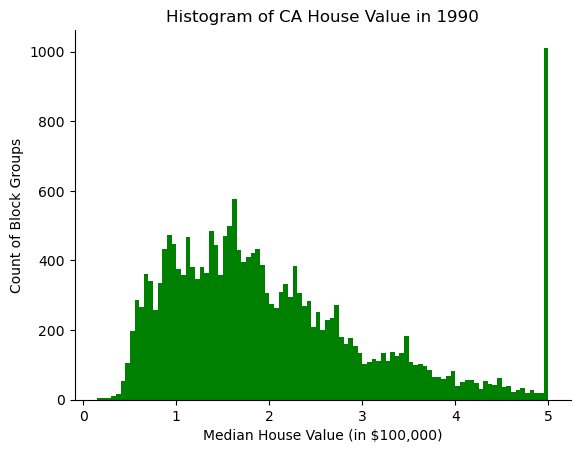

In [14]:
# prepare IPython to work with matplotlib and import the library to something convenient
# %matplotlib inline  
import matplotlib.pyplot as plt  

bin_count = int((cal_df['MedHouseVal'].max() - cal_df['MedHouseVal'].min()) / 0.05)


# edit the code below to make the graph look good
plt.hist(cal_df['MedHouseVal'],bins = bin_count, color='green')
plt.xlabel('Median House Value (in $100,000)')
plt.ylabel('Count of Block Groups')
plt.title('Histogram of CA House Value in 1990')

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.show()

### 2.2: Histogram of average occupancy

Now use your histograming skills to create a fine looking histogram of the average number of household members ("AveOccup"). In the same figure, plot the mean and median values of this variable. (Hint: applying a very common transformation to the data might make things easier).


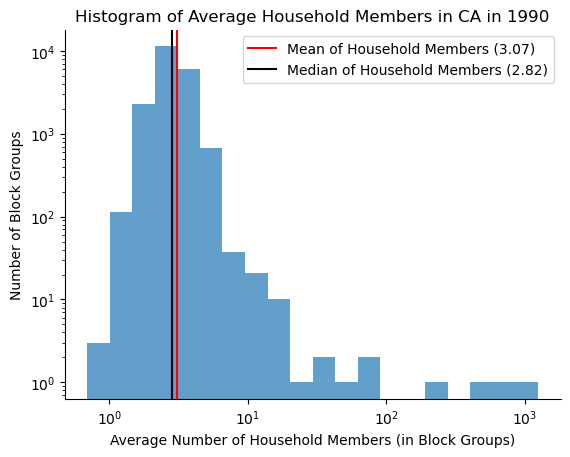

In [72]:
AveOc_mean = cal_df['AveOccup'].mean()
AveOc_median = cal_df['AveOccup'].median()
log_mean = np.log10(AveOc_mean)
log_median = np.log10(AveOc_median)

counts, bins, _ = plt.hist(np.log10(cal_df['AveOccup']),bins = 20,alpha = 0.7,log = True)

ticks = [0, 1.0, 2.0, 3.0]
tick_labels = [f'$10^{x}$' for x in [0, 1, 2, 3]]

plt.gca().set_xticks(ticks)
plt.gca().set_xticklabels(tick_labels)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.axvline(log_mean, color = 'red', label = 'Mean of Household Members ({:.2f})'.format(AveOc_mean))
plt.axvline(log_median, color = 'black', label = 'Median of Household Members ({:.2f})'.format(AveOc_median))

plt.legend()

plt.xlabel('Average Number of Household Members (in Block Groups)')
plt.ylabel('Number of Block Groups')
plt.title('Histogram of Average Household Members in CA in 1990')

plt.show()

### 2.3: Scatter plot of housing prices and population

Use matplotlib to create a scatter plot that shows the relationship between the block group median house value (y-axis) and the block group population (x-axis). Properly label your axes, and make sure that your graphic looks polished and professional.

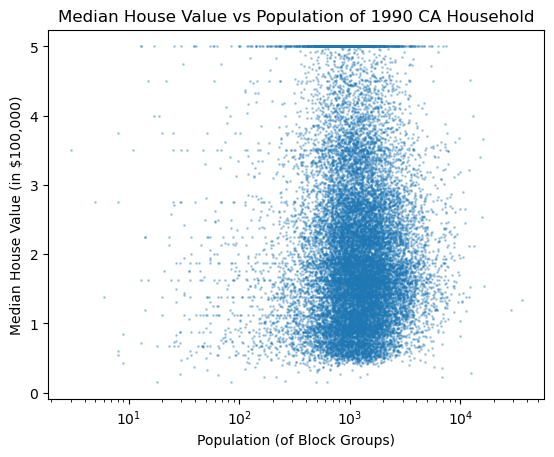

In [16]:
plt.scatter(cal_df['Population'], cal_df['MedHouseVal'], s=1,alpha = 0.3)
plt.xscale('log')

plt.title('Median House Value vs Population of 1990 CA Household')
plt.xlabel('Population (of Block Groups)')
plt.ylabel('Median House Value (in $100,000)')

# Showing the plot
plt.show()

### 2.4: Interpret

What do you observe in the above scatter plot? Does there appear to be a relationship between media house value and population in California? Calculate the correlation between these two variables. Do you think this relationship is causal, or just a correlation? Justify your position and compare to your answer in section 1.4.

In [17]:
print(cal_df['Population'].corr(cal_df['MedHouseVal']))

-0.024649678888894886


The household price seems to be evenly spread from 0 to 500,000 for different value of population. It seems like there appears to be no or only a very small relationship between median house value and population in California. As the calculated correlation suggests, the relationship is very small(-0.02). This correspond with my answer in 1.4. I think this relationship is just a correlation since this is just an observation study and not an experimental one, so no causual relationship could be concluded, same as the reasoning as in 1.4.

### 2.5 Correlation Matrix

Calculate the correlation of every pair of variables in the dataset. Create a *K* x *K* matrix where the value in the (*i*,*j*) cell is the correlation between the *i*th and *j*th variable. Show off your skills by coloring the cell so that large positive correlations appear green and large negative correlations appear red (use a gradient to make this pretty). What two variables appear to me most positively and negatively correlated? Explain these results.

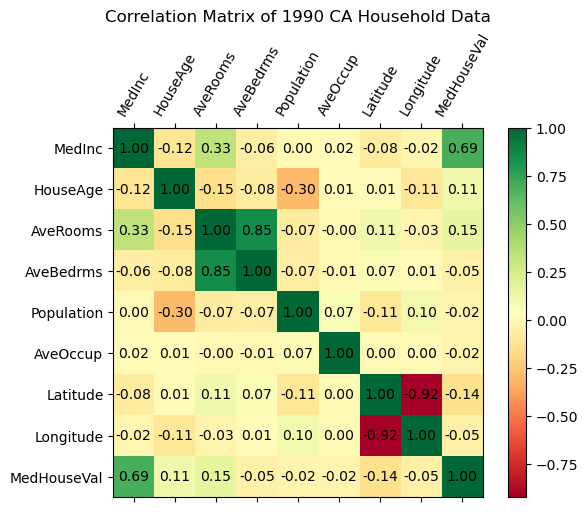

In [20]:
cor = cal_df.corr()
n_vars = cor.shape[0]

leg, fig = plt.subplots()
leg.colorbar(fig.matshow(cor, cmap='RdYlGn'))

ticks = np.arange(0, n_vars, 1)
fig.set_xticks(ticks)
fig.set_yticks(ticks)
fig.set_xticklabels(cor.columns,rotation = 60)
fig.set_yticklabels(cor.columns)
fig.set_title('Correlation Matrix of 1990 CA Household Data')

for i in range(len(cor.columns)):
    for j in range(len(cor.columns)):
        text = fig.text(j, i, "%.2f" % cor.iloc[i, j],
                       ha="center", va="center", color="black")

It seemes like average bedbooms appear to be most positively correlated: A large household is likely to have large value of rooms and bedrooms; a small household is likely to have small value of rooms and bedrooms; and it is also very unlikely that a household have large value of rooms but only few bedrooms and vice versa. Therefore it is reasonable that number of bedrooms and number of rooms correlates with each other.
It seems like latitude and longitude appear to be most negatively correlated: California is a state lying diagonally from north-west(higher positive latitude, higher negative longitude) to south-east(smaller positive latitude, smaller negative longitude), therefore, a block with higher positive longitude is likely to have a higher negative latitude, and vice versa, hence the negative correlation.

### 2.6 Create your own (creative and effective) visualization

Use another type of graph or chart to illustrate an interesting pattern in the data.  Be creative in your visualization, and make sure to produce a "publication-quality" graph.  Points will be given for useful and creative graphs; points will be deducted for confusing issues like unlabeled axes.  If you're new to data visualization, [this guide](http://pubs.aeaweb.org/doi/pdfplus/10.1257/jep.28.1.209) is a good place to start.

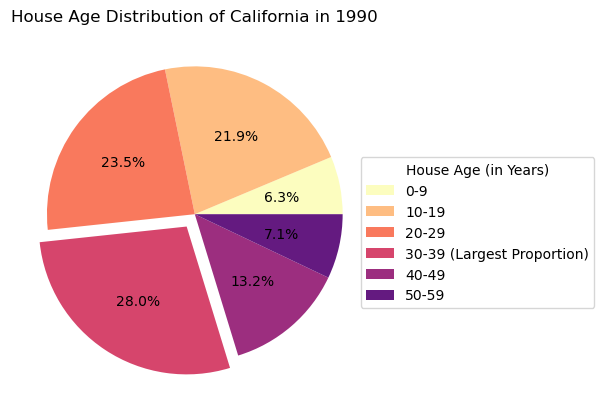

In [83]:
bins = [0, 10, 20, 30, 40, 50, 60]

counts, _ = np.histogram(cal_df['HouseAge'], bins)

labels = [f"{bins[i]}-{bins[i+1]-1}" for i in range(len(bins)-1)]
labels[3] = labels[3] + ' (Largest Proportion)'
sizes = counts

colors = plt.cm.magma(np.linspace(1, 0.3, len(labels)))
explode = (0, 0, 0, 0.1, 0, 0)
plt.pie(sizes, colors = colors, explode = explode, autopct='%1.1f%%', startangle= 0)


plt.legend(labels, title="House Age (in Years)", loc="center right",bbox_to_anchor=(1.1,0.2,0.5,0.5))

plt.title('House Age Distribution of California in 1990')
plt.show()

The graph above shows the house age distribution of California in 1990, we could see that house between 30-39 years old takes the largest proportion. It would be interesting to compare this data with house age distribution in 2000.